In [1]:
# Import libs

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

from google.colab import files

In [3]:

uploader = files.upload()

Saving openpowerlifting.csv to openpowerlifting.csv


In [2]:
# Grab data from .csv file

df = pd.read_csv(open('openpowerlifting.csv', 'rb'))

<ipython-input-2-4b3df0d14f31>:3: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(open('openpowerlifting.csv', 'rb'))


In [3]:
# Show data

df.head()

,Name,Sex,Event,Equipment,Age,AgeClass,Division,BodyweightKg,WeightClassKg,Squat1Kg,...,McCulloch,Glossbrenner,IPFPoints,Tested,Country,Federation,Date,MeetCountry,MeetState,MeetName
0,Abbie Murphy,F,SBD,Wraps,29.0,24-34,F-OR,59.8,60,80.0,...,324.16,286.42,511.15,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
1,Abbie Tuong,F,SBD,Wraps,29.0,24-34,F-OR,58.5,60,100.0,...,378.07,334.16,595.65,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
2,Ainslee Hooper,F,B,Raw,40.0,40-44,F-OR,55.4,56,NaN,...,38.56,34.12,313.97,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
3,Amy Moldenhauer,F,SBD,Wraps,23.0,20-23,F-OR,60.0,60,-105.0,...,345.61,305.37,547.04,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
4,Andrea Rowan,F,SBD,Wraps,45.0,45-49,F-OR,104.0,110,120.0,...,338.91,274.56,550.08,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup


In [4]:
# Show all missing data

print(df.isna().sum())

Name                     0
Sex                      0
Event                    0
Equipment                0
Age                 665827
AgeClass            636554
Division              8178
BodyweightKg         16732
WeightClassKg        13312
Squat1Kg           1085774
Squat2Kg           1090005
Squat3Kg           1099512
Squat4Kg           1419658
Best3SquatKg        391904
Bench1Kg            923575
Bench2Kg            929868
Bench3Kg            944869
Bench4Kg           1413849
Best3BenchKg        147173
Deadlift1Kg        1059810
Deadlift2Kg        1067331
Deadlift3Kg        1083407
Deadlift4Kg        1414108
Best3DeadliftKg     341546
TotalKg             110170
Place                    0
Wilks               118947
McCulloch           119100
Glossbrenner        118947
IPFPoints           150068
Tested              329462
Country            1034470
Federation               0
Date                     0
MeetCountry              0
MeetState           481809
MeetName                 0
d

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1423354 entries, 0 to 1423353
Data columns (total 37 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Name             1423354 non-null  object 
 1   Sex              1423354 non-null  object 
 2   Event            1423354 non-null  object 
 3   Equipment        1423354 non-null  object 
 4   Age              757527 non-null   float64
 5   AgeClass         786800 non-null   object 
 6   Division         1415176 non-null  object 
 7   BodyweightKg     1406622 non-null  float64
 8   WeightClassKg    1410042 non-null  object 
 9   Squat1Kg         337580 non-null   float64
 10  Squat2Kg         333349 non-null   float64
 11  Squat3Kg         323842 non-null   float64
 12  Squat4Kg         3696 non-null     float64
 13  Best3SquatKg     1031450 non-null  float64
 14  Bench1Kg         499779 non-null   float64
 15  Bench2Kg         493486 non-null   float64
 16  Bench3Kg         4

In [6]:
# Show missing values in %

for col in df.columns:
    print(f'{col} : {df[col].isna().sum() / df.shape[0] * 100:.2f}%')

Name : 0.00%
Sex : 0.00%
Event : 0.00%
Equipment : 0.00%
Age : 46.78%
AgeClass : 44.72%
Division : 0.57%
BodyweightKg : 1.18%
WeightClassKg : 0.94%
Squat1Kg : 76.28%
Squat2Kg : 76.58%
Squat3Kg : 77.25%
Squat4Kg : 99.74%
Best3SquatKg : 27.53%
Bench1Kg : 64.89%
Bench2Kg : 65.33%
Bench3Kg : 66.38%
Bench4Kg : 99.33%
Best3BenchKg : 10.34%
Deadlift1Kg : 74.46%
Deadlift2Kg : 74.99%
Deadlift3Kg : 76.12%
Deadlift4Kg : 99.35%
Best3DeadliftKg : 24.00%
TotalKg : 7.74%
Place : 0.00%
Wilks : 8.36%
McCulloch : 8.37%
Glossbrenner : 8.36%
IPFPoints : 10.54%
Tested : 23.15%
Country : 72.68%
Federation : 0.00%
Date : 0.00%
MeetCountry : 0.00%
MeetState : 33.85%
MeetName : 0.00%


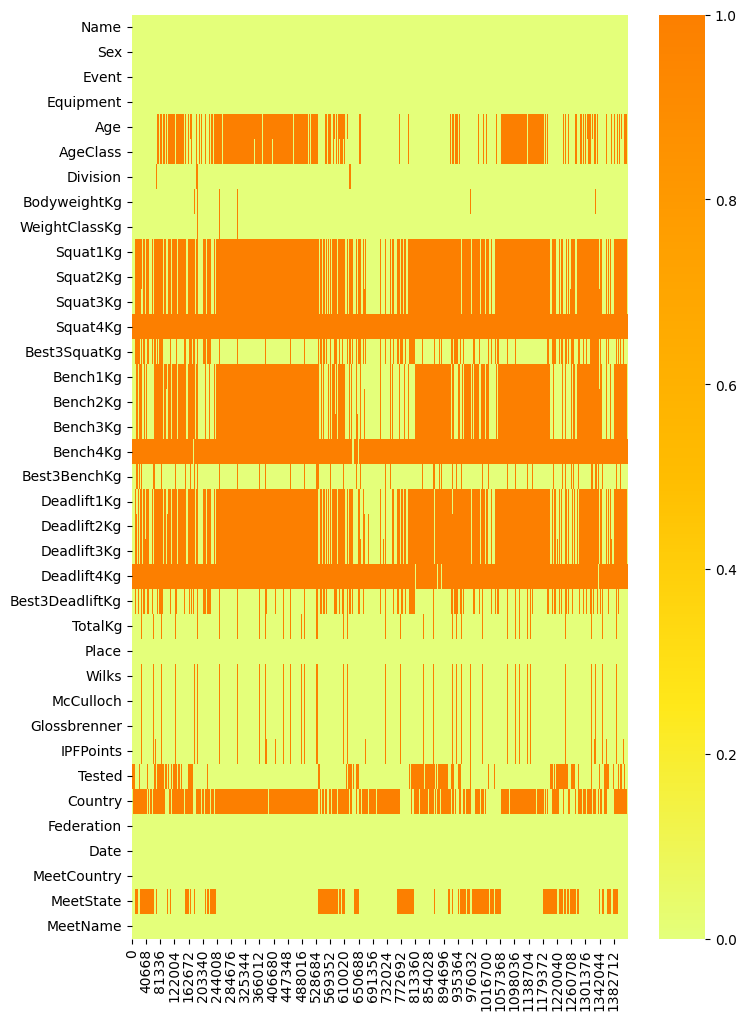

In [7]:
# show graph

plt.figure(figsize = (8, 12))
sns.heatmap(df.isna().transpose(), cmap = 'Wistia')
plt.show()

In [8]:
# Drop colums where at leat 50% of nan data
# In perpose it will be hard to reconcstruate and usually not accurate

df = df.dropna(thresh = df.shape[0] // 2, axis = 1)

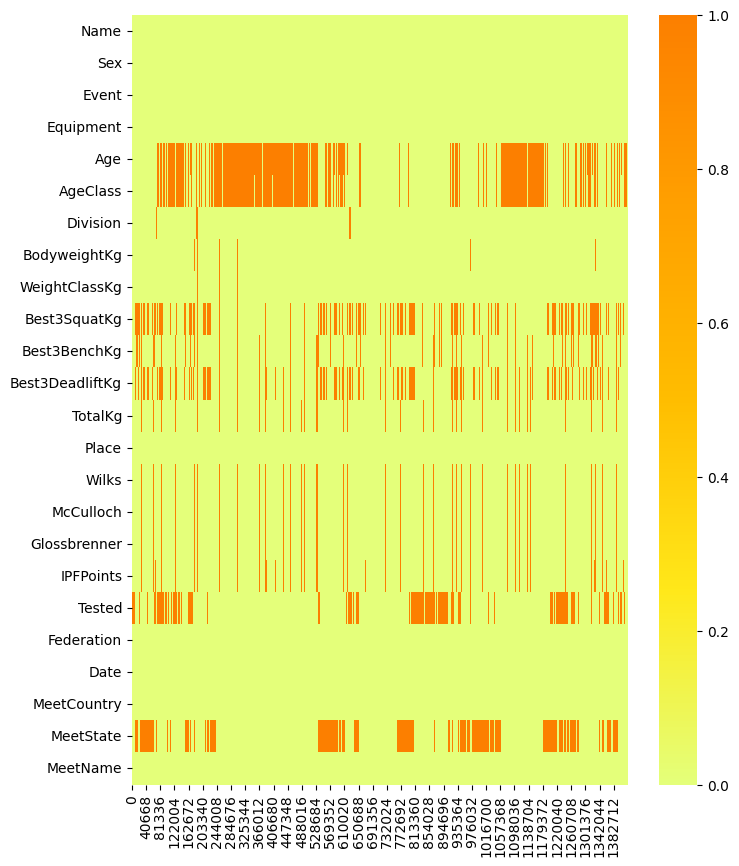

In [9]:
# And show heatmap now

plt.figure(figsize = (8, 10))
sns.heatmap(df.isna().transpose(), cmap = 'Wistia')
plt.show()

In [10]:
df.shape

(1423354, 24)

In [11]:
# So we have 24 featurs, now get rid of rows with less then 20 non-empty featurs

df = df.dropna(thresh = 20, axis = 0)
df.shape

(1260355, 24)

Name                    0
Sex                     0
Event                   0
Equipment               0
Age                553584
AgeClass           527309
Division             5575
BodyweightKg            0
WeightClassKg        2174
Best3SquatKg       276386
Best3BenchKg        54567
Best3DeadliftKg    208262
TotalKg                 0
Place                   0
Wilks                   0
McCulloch             127
Glossbrenner            0
IPFPoints           26928
Tested             285410
Federation              0
Date                    0
MeetCountry             0
MeetState          416934
MeetName                0
dtype: int64


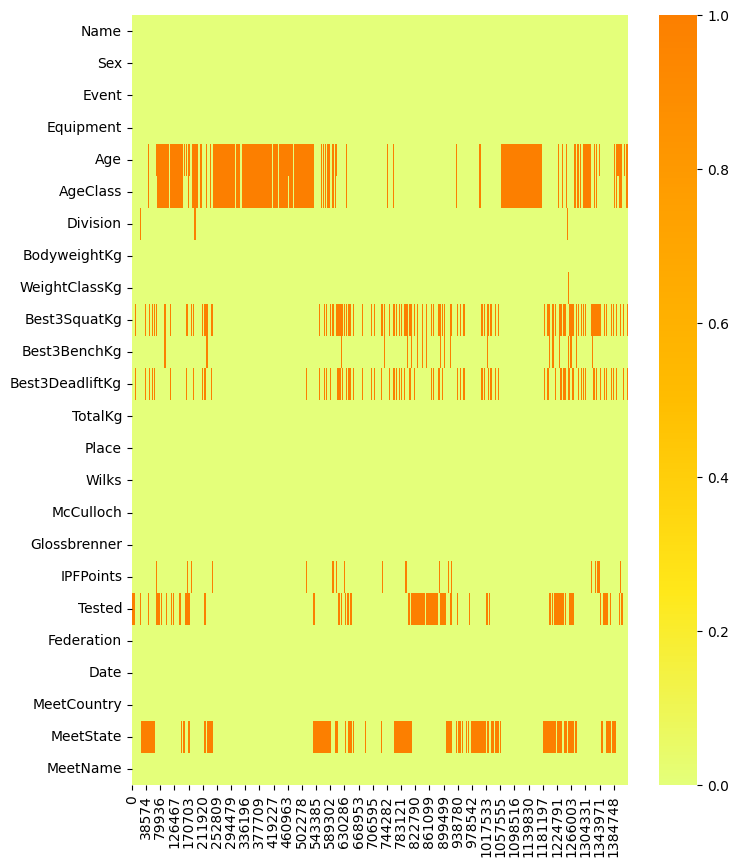

In [12]:
# So we get rid of less than 200k rows
# Show heat map now

print(df.isna().sum())

plt.figure(figsize = (8, 10))
sns.heatmap(df.isna().transpose(), cmap = 'Wistia')
plt.show()

In [13]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1260355 entries, 0 to 1423351
Data columns (total 24 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Name             1260355 non-null  object 
 1   Sex              1260355 non-null  object 
 2   Event            1260355 non-null  object 
 3   Equipment        1260355 non-null  object 
 4   Age              706771 non-null   float64
 5   AgeClass         733046 non-null   object 
 6   Division         1254780 non-null  object 
 7   BodyweightKg     1260355 non-null  float64
 8   WeightClassKg    1258181 non-null  object 
 9   Best3SquatKg     983969 non-null   float64
 10  Best3BenchKg     1205788 non-null  float64
 11  Best3DeadliftKg  1052093 non-null  float64
 12  TotalKg          1260355 non-null  float64
 13  Place            1260355 non-null  object 
 14  Wilks            1260355 non-null  float64
 15  McCulloch        1260228 non-null  float64
 16  Glossbrenner     1

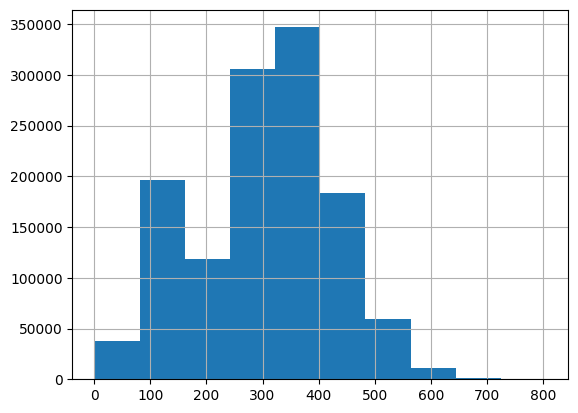

In [14]:
df['McCulloch'].hist()
plt.show()

In [15]:
# Fill this walue with median

df['McCulloch'] = df['McCulloch'].fillna(df['McCulloch'].median())

print(df.isna().sum())

Name                    0
Sex                     0
Event                   0
Equipment               0
Age                553584
AgeClass           527309
Division             5575
BodyweightKg            0
WeightClassKg        2174
Best3SquatKg       276386
Best3BenchKg        54567
Best3DeadliftKg    208262
TotalKg                 0
Place                   0
Wilks                   0
McCulloch               0
Glossbrenner            0
IPFPoints           26928
Tested             285410
Federation              0
Date                    0
MeetCountry             0
MeetState          416934
MeetName                0
dtype: int64


In [16]:
# Now handle missing values in Division
# But first of all set division name in lower case

df['Division'] = df['Division'].str.lower()

df['Division'].value_counts()

open                      296268
boys                      242955
girls                     104013
juniors                    46496
mr-o                       28361
                           ...  
pro masters 50                 1
amateur masters 41             1
amateur masters 46             1
amateur masters police         1
juniors under 34               1
Name: Division, Length: 4538, dtype: int64

In [17]:
# See than 'Open' division is the most common, so replace missing values into 'open'
# But .mode() retuen pandas Series, so we need graap [0] to get value ('open')

# Use iloc[0] to get first mode in case we have multiple modes

df['Division'] = df['Division'].fillna(df['Division'].mode().iloc[0])
print(df['Division'].isna().sum())

0


In [18]:
print(df.isna().sum())

Name                    0
Sex                     0
Event                   0
Equipment               0
Age                553584
AgeClass           527309
Division                0
BodyweightKg            0
WeightClassKg        2174
Best3SquatKg       276386
Best3BenchKg        54567
Best3DeadliftKg    208262
TotalKg                 0
Place                   0
Wilks                   0
McCulloch               0
Glossbrenner            0
IPFPoints           26928
Tested             285410
Federation              0
Date                    0
MeetCountry             0
MeetState          416934
MeetName                0
dtype: int64


In [19]:
print(df['Best3DeadliftKg'].value_counts(), '\n')
print(df['Best3BenchKg'].value_counts(), '\n')
print(df['Best3SquatKg'].value_counts(), '\n')

200.00    17447
250.00    16717
240.00    15263
220.00    15140
230.00    14947
          ...  
61.70         1
277.30        1
149.50        1
113.20        1
307.31        1
Name: Best3DeadliftKg, Length: 1555, dtype: int64 

150.00    18954
120.00    18713
140.00    18281
130.00    18120
125.00    17410
          ...  
52.30         1
197.70        1
143.20        1
90.90         1
148.55        1
Name: Best3BenchKg, Length: 1562, dtype: int64 

200.00    14681
136.08    11887
160.00    11689
190.00    11649
170.00    11598
          ...  
10.50         1
10.00         1
7.50          1
25.50         1
309.58        1
Name: Best3SquatKg, Length: 1640, dtype: int64 



In [20]:
# So we have 3 featurs that in more than 1 million records has nearly 1500 diffrent values
# So it posible to think that we can use index on each colum and fill this values as index

df['Best3DeadliftKg_nan'] = 0
df['Best3BenchKg_nan'] = 0
df['Best3SquatKg_nan'] = 0

df.head()

,Name,Sex,Event,Equipment,Age,AgeClass,Division,BodyweightKg,WeightClassKg,Best3SquatKg,...,IPFPoints,Tested,Federation,Date,MeetCountry,MeetState,MeetName,Best3DeadliftKg_nan,Best3BenchKg_nan,Best3SquatKg_nan
0,Abbie Murphy,F,SBD,Wraps,29.0,24-34,f-or,59.8,60,105.0,...,511.15,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup,0,0,0
1,Abbie Tuong,F,SBD,Wraps,29.0,24-34,f-or,58.5,60,120.0,...,595.65,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup,0,0,0
2,Ainslee Hooper,F,B,Raw,40.0,40-44,f-or,55.4,56,NaN,...,313.97,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup,0,0,0
3,Amy Moldenhauer,F,SBD,Wraps,23.0,20-23,f-or,60.0,60,105.0,...,547.04,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup,0,0,0
4,Andrea Rowan,F,SBD,Wraps,45.0,45-49,f-or,104.0,110,140.0,...,550.08,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup,0,0,0


In [21]:
# So just set '1' in new colum if we do not know some data of sportsmens best tres
# And set 0 instand of Nan
# Just keep in mind that '0' meand we do not know what weight human

df.loc[df['Best3DeadliftKg'].isna(), 'Best3DeadliftKg_nan'] = 1
df.loc[df['Best3BenchKg'].isna(), 'Best3BenchKg_nan'] = 1
df.loc[df['Best3SquatKg'].isna(), 'Best3SquatKg_nan'] = 1

df['Best3DeadliftKg'] = df['Best3DeadliftKg'].fillna(0)
df['Best3BenchKg'] = df['Best3BenchKg'].fillna(0)
df['Best3SquatKg'] = df['Best3SquatKg'].fillna(0)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1260355 entries, 0 to 1423351
Data columns (total 27 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   Name                 1260355 non-null  object 
 1   Sex                  1260355 non-null  object 
 2   Event                1260355 non-null  object 
 3   Equipment            1260355 non-null  object 
 4   Age                  706771 non-null   float64
 5   AgeClass             733046 non-null   object 
 6   Division             1260355 non-null  object 
 7   BodyweightKg         1260355 non-null  float64
 8   WeightClassKg        1258181 non-null  object 
 9   Best3SquatKg         1260355 non-null  float64
 10  Best3BenchKg         1260355 non-null  float64
 11  Best3DeadliftKg      1260355 non-null  float64
 12  TotalKg              1260355 non-null  float64
 13  Place                1260355 non-null  object 
 14  Wilks                1260355 non-null  float64
 15

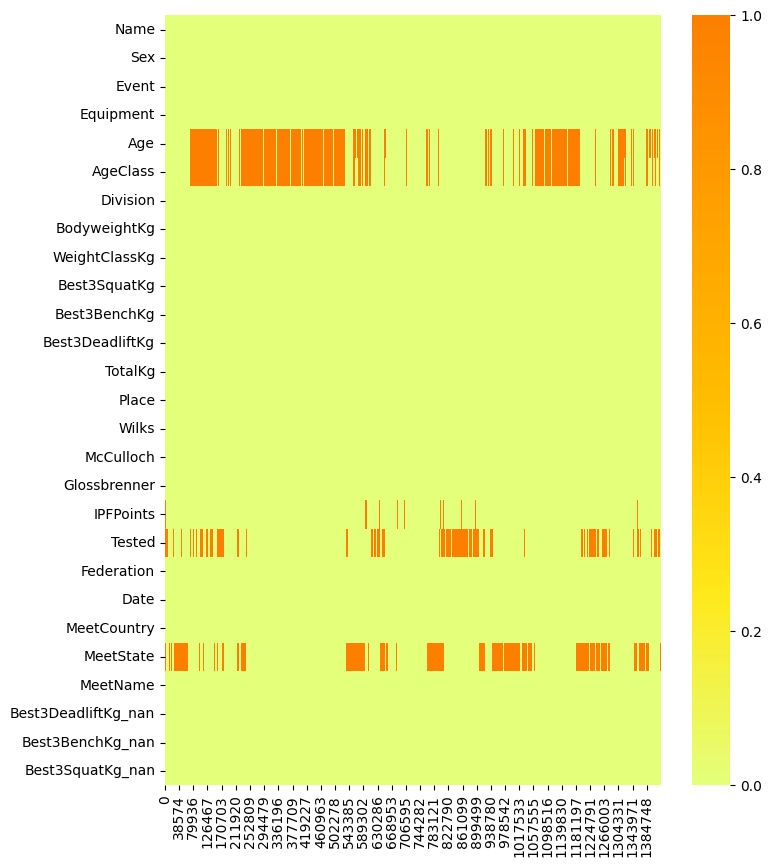

In [22]:
# Now show heatmap

plt.figure(figsize = (8, 10))
sns.heatmap(df.isna().transpose(), cmap = 'Wistia')
plt.show()

In [23]:
# Now handle Age colum

df['AgeClass'].value_counts()

24-34     226608
20-23     128125
35-39      60947
18-19      59941
40-44      59132
16-17      43387
45-49      42552
50-54      33744
13-15      23823
55-59      20596
60-64      14538
65-69       8203
70-74       5552
5-12        2488
75-79       2366
80-999      1044
Name: AgeClass, dtype: int64

In [24]:
print(df['Age'].isna().sum())

553584


In [25]:
age_class_missing_age = df[df['Age'].isna()]['AgeClass'].value_counts()
age_class_missing_age

20-23     6219
13-15     4137
40-44     2733
24-34     2573
45-49     2291
50-54     1609
35-39     1556
18-19     1174
55-59     1084
16-17     1019
60-64      630
65-69      368
70-74      350
5-12       288
80-999     212
75-79      159
Name: AgeClass, dtype: int64

In [26]:
# Do not use 999 age, so people usually do not live till 999, just remain 99

age_class_missing_age_df = age_class_missing_age.index.str.extract('(\d\d)-(\d\d)')
print(age_class_missing_age_df)

      0    1
0    20   23
1    13   15
2    40   44
3    24   34
4    45   49
5    50   54
6    35   39
7    18   19
8    55   59
9    16   17
10   60   64
11   65   69
12   70   74
13  NaN  NaN
14   80   99
15   75   79


In [27]:
age_class_missing_age_df['AgeClass'] = age_class_missing_age.index
age_class_missing_age_df

,0,1,AgeClass
0,20,23,20-23
1,13,15,13-15
2,40,44,40-44
3,24,34,24-34
4,45,49,45-49
5,50,54,50-54
6,35,39,35-39
7,18,19,18-19
8,55,59,55-59
9,16,17,16-17


In [28]:
def count_mean(x):
    if not x[0] is np.nan:
        return ((int(x[0]) + int(x[1])) / 2)
    else:
        return np.nan

age_class_missing_age_df['mean'] = age_class_missing_age_df.apply(count_mean, axis = 1)
age_class_missing_age_df

,0,1,AgeClass,mean
0,20,23,20-23,21.5
1,13,15,13-15,14.0
2,40,44,40-44,42.0
3,24,34,24-34,29.0
4,45,49,45-49,47.0
5,50,54,50-54,52.0
6,35,39,35-39,37.0
7,18,19,18-19,18.5
8,55,59,55-59,57.0
9,16,17,16-17,16.5


In [29]:
# merge tables
df = df.merge(age_class_missing_age_df[['AgeClass', 'mean']], on = 'AgeClass', how = 'left')
df.head()

,Name,Sex,Event,Equipment,Age,AgeClass,Division,BodyweightKg,WeightClassKg,Best3SquatKg,...,Tested,Federation,Date,MeetCountry,MeetState,MeetName,Best3DeadliftKg_nan,Best3BenchKg_nan,Best3SquatKg_nan,mean
0,Abbie Murphy,F,SBD,Wraps,29.0,24-34,f-or,59.8,60,105.0,...,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup,0,0,0,29.0
1,Abbie Tuong,F,SBD,Wraps,29.0,24-34,f-or,58.5,60,120.0,...,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup,0,0,0,29.0
2,Ainslee Hooper,F,B,Raw,40.0,40-44,f-or,55.4,56,0.0,...,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup,1,0,1,42.0
3,Amy Moldenhauer,F,SBD,Wraps,23.0,20-23,f-or,60.0,60,105.0,...,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup,0,0,0,21.5
4,Andrea Rowan,F,SBD,Wraps,45.0,45-49,f-or,104.0,110,140.0,...,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup,0,0,0,47.0


In [30]:
mean_age_by_age_group = df.groupby('AgeClass')['mean'].transform('mean')
mean_age_by_age_group

0          29.0
1          29.0
2          42.0
3          21.5
4          47.0
           ... 
1260350    67.0
1260351    67.0
1260352    62.0
1260353    57.0
1260354    62.0
Name: mean, Length: 1260355, dtype: float64

In [31]:
df['Age'] = df['Age'].fillna(mean_age_by_age_group)
df['Age'].isna().sum()

527470

In [32]:
# So there were 553584 missing ages in 'Age' colum, now there are 527470

df = df.drop('mean', axis = 1)
df.head()

,Name,Sex,Event,Equipment,Age,AgeClass,Division,BodyweightKg,WeightClassKg,Best3SquatKg,...,IPFPoints,Tested,Federation,Date,MeetCountry,MeetState,MeetName,Best3DeadliftKg_nan,Best3BenchKg_nan,Best3SquatKg_nan
0,Abbie Murphy,F,SBD,Wraps,29.0,24-34,f-or,59.8,60,105.0,...,511.15,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup,0,0,0
1,Abbie Tuong,F,SBD,Wraps,29.0,24-34,f-or,58.5,60,120.0,...,595.65,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup,0,0,0
2,Ainslee Hooper,F,B,Raw,40.0,40-44,f-or,55.4,56,0.0,...,313.97,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup,1,0,1
3,Amy Moldenhauer,F,SBD,Wraps,23.0,20-23,f-or,60.0,60,105.0,...,547.04,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup,0,0,0
4,Andrea Rowan,F,SBD,Wraps,45.0,45-49,f-or,104.0,110,140.0,...,550.08,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup,0,0,0


In [33]:
# Let's do same thing using Division

print(df['Division'].value_counts())

open                      301843
boys                      242955
girls                     104013
juniors                    46496
mr-o                       28361
                           ...  
pro masters 50                 1
amateur masters 41             1
amateur masters 46             1
amateur masters police         1
juniors under 34               1
Name: Division, Length: 4538, dtype: int64


In [34]:
division_missing_age = df[df['Age'].isna()]['Division'].value_counts()
division_missing_age

boys                229233
girls                98058
open                 74648
juniors              11283
amateur open          7473
                     ...  
м2 50-59                 1
wp-x                     1
submasters 30-38         1
wsm-2                    1
below class 2            1
Name: Division, Length: 1372, dtype: int64

In [35]:
division_missing_age_df = division_missing_age.index.str.extract('(\d\d)-(\d\d)|(\d\d)')
print(division_missing_age_df)

        0    1    2
0     NaN  NaN  NaN
1     NaN  NaN  NaN
2     NaN  NaN  NaN
3     NaN  NaN  NaN
4     NaN  NaN  NaN
...   ...  ...  ...
1367   50   59  NaN
1368  NaN  NaN  NaN
1369   30   38  NaN
1370  NaN  NaN  NaN
1371  NaN  NaN  NaN

[1372 rows x 3 columns]


In [36]:
def count_mean(x):
    if not x[0] is np.nan:
        return ((int(x[0]) + int(x[1])) / 2)
    elif not x[2] is np.nan:
        return int(x[2])
    else:
        return np.nan

division_missing_age_df['mean'] = division_missing_age_df.apply(count_mean, axis = 1)
division_missing_age_df

,0,1,2,mean
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
...,...,...,...,...
1367,50,59,NaN,54.5
1368,NaN,NaN,NaN,NaN
1369,30,38,NaN,34.0
1370,NaN,NaN,NaN,NaN


In [37]:
division_missing_age_df['Division'] = division_missing_age.index
division_missing_age_df

,0,1,2,mean,Division
0,NaN,NaN,NaN,NaN,boys
1,NaN,NaN,NaN,NaN,girls
2,NaN,NaN,NaN,NaN,open
3,NaN,NaN,NaN,NaN,juniors
4,NaN,NaN,NaN,NaN,amateur open
...,...,...,...,...,...
1367,50,59,NaN,54.5,м2 50-59
1368,NaN,NaN,NaN,NaN,wp-x
1369,30,38,NaN,34.0,submasters 30-38
1370,NaN,NaN,NaN,NaN,wsm-2


In [38]:
# merge tables
df = df.merge(division_missing_age_df[['Division', 'mean']], on = 'Division', how = 'left')
df.head()

,Name,Sex,Event,Equipment,Age,AgeClass,Division,BodyweightKg,WeightClassKg,Best3SquatKg,...,Tested,Federation,Date,MeetCountry,MeetState,MeetName,Best3DeadliftKg_nan,Best3BenchKg_nan,Best3SquatKg_nan,mean
0,Abbie Murphy,F,SBD,Wraps,29.0,24-34,f-or,59.8,60,105.0,...,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup,0,0,0,NaN
1,Abbie Tuong,F,SBD,Wraps,29.0,24-34,f-or,58.5,60,120.0,...,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup,0,0,0,NaN
2,Ainslee Hooper,F,B,Raw,40.0,40-44,f-or,55.4,56,0.0,...,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup,1,0,1,NaN
3,Amy Moldenhauer,F,SBD,Wraps,23.0,20-23,f-or,60.0,60,105.0,...,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup,0,0,0,NaN
4,Andrea Rowan,F,SBD,Wraps,45.0,45-49,f-or,104.0,110,140.0,...,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup,0,0,0,NaN


In [39]:
mean_age_by_devision = df.groupby('Division')['mean'].transform('mean')
mean_age_by_devision

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
           ..
1260350   NaN
1260351   NaN
1260352   NaN
1260353   NaN
1260354   NaN
Name: mean, Length: 1260355, dtype: float64

In [40]:
df[df['Age'].isna()]

,Name,Sex,Event,Equipment,Age,AgeClass,Division,BodyweightKg,WeightClassKg,Best3SquatKg,...,Tested,Federation,Date,MeetCountry,MeetState,MeetName,Best3DeadliftKg_nan,Best3BenchKg_nan,Best3SquatKg_nan,mean
103,Tim Plummer,M,SBD,Wraps,NaN,NaN,m-or,109.5,110,165.0,...,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup,0,0,0,NaN
620,Mike Read,M,SBD,Wraps,NaN,NaN,m-or,120.9,125,190.0,...,NaN,GPC-AUS,2013-04-28,Australia,VIC,Victoria Qualifier,0,0,0,NaN
877,Alexandra Hegman,F,SBD,Wraps,NaN,NaN,f-or,63.2,67.5,120.0,...,NaN,GPC-AUS,2017-09-09,Australia,VIC,Melbourne Cup,0,0,0,NaN
3595,Eddy Dargham,M,SBD,Wraps,NaN,NaN,m-or,82.3,82.5,210.0,...,NaN,GPC-AUS,2014-03-08,Australia,VIC,VIC States,0,0,0,NaN
4894,Sarah Hansen,F,SBD,Wraps,NaN,NaN,f-or,75.0,75,135.0,...,NaN,GPC-AUS,2017-01-21,Australia,VIC,VIC Summer Classic,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1260256,Michał Kowalczyk,M,SBD,Raw,NaN,NaN,juniors under 16,79.2,83,175.0,...,Yes,PZKFiTS,2017-04-01,Poland,NaN,Polish Classic Powerlifting Cup,0,0,0,16.0
1260258,Norbert Kaczor,M,SBD,Raw,NaN,NaN,juniors under 16,84.4,93,137.5,...,Yes,PZKFiTS,2017-04-01,Poland,NaN,Polish Classic Powerlifting Cup,0,0,0,16.0
1260259,Daniel Machulik,M,SBD,Raw,NaN,NaN,juniors under 16,83.3,93,115.0,...,Yes,PZKFiTS,2017-04-01,Poland,NaN,Polish Classic Powerlifting Cup,0,0,0,16.0
1260260,Jakub Ostrowski,M,SBD,Raw,NaN,NaN,juniors under 16,73.0,74,110.0,...,Yes,PZKFiTS,2017-04-01,Poland,NaN,Polish Classic Powerlifting Cup,0,0,0,16.0


In [41]:
df['Age'] = df['Age'].fillna(mean_age_by_devision)
df['Age'].isna().sum()

498508

In [42]:
# Now we have 498508 instand of 527470 missing age values

df[df['Division'].isna()].groupby('Division').size()

Series([], dtype: int64)

In [43]:
# Let's see 20 most popular divisions by missing ages

df = df.drop('mean', axis = 1)

df.groupby('Division')['Age'].apply(lambda x: x.isnull().sum()).reset_index(name = 'MissingAgeCount').sort_values('MissingAgeCount', ascending = False)[:20]

,Division,MissingAgeCount
441,boys,229233
1449,girls,98058
3694,open,74648
1618,juniors,11283
313,amateur open,7473
1926,m-c-open,6033
3046,masters 1,4798
4387,varsity,4165
4113,sub-juniors,4019
606,f-c-open,3024


In [44]:
# Let's get median age in each division and fill empty rows with

df['Age'] = df.groupby('Division')['Age'].transform(lambda x: x.fillna(x.median()) if x.notna().sum() != 0 else x)

df.groupby('Division')['Age'].apply(lambda x: x.isnull().sum()).reset_index(name = 'MissingAgeCount').sort_values('MissingAgeCount', ascending = False)[:20]

,Division,MissingAgeCount
4075,sophomore,50
1496,high school pure,38
4466,wsqopen,16
206,adfpa open,14
100,1year,14
3172,masters heavy,14
1507,hs jr/sr,13
3108,masters 5 (pure),11
1506,hs fr/so,11
3929,pure & natural,11


In [45]:
print(df['Age'].isna().sum())

516


In [46]:
# So i guess we can simply fill with median of all dataset remain 516 values

df['Age'] = df['Age'].fillna(df['Age'].median())

print(df['Age'].isna().sum())

0


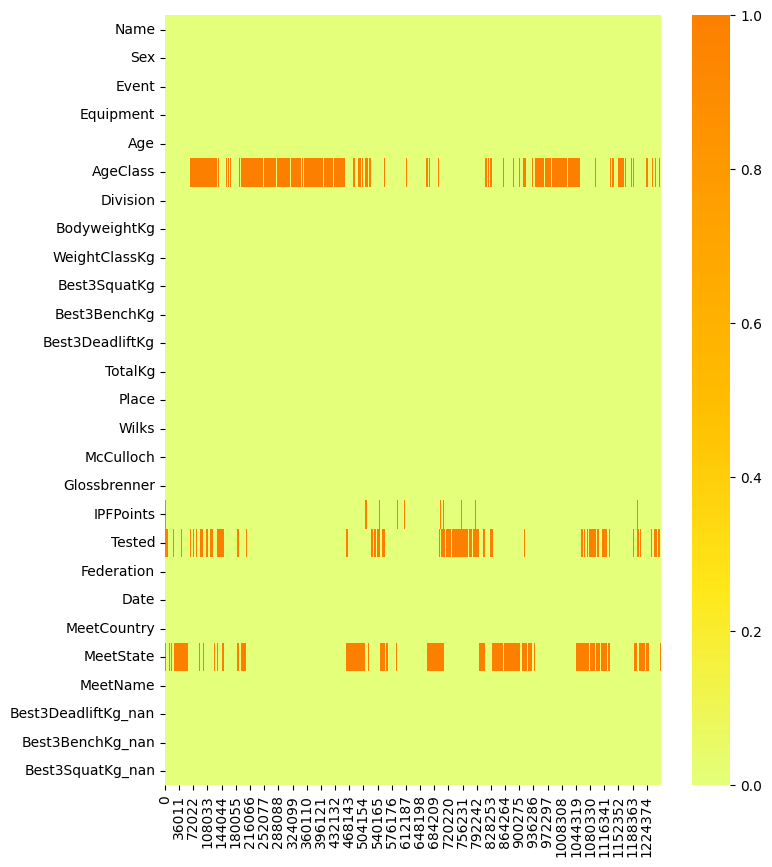

In [47]:
# Show heat map now

plt.figure(figsize = (8, 10))
sns.heatmap(df.isna().transpose(), cmap = 'Wistia')
plt.show()

In [48]:
# May be there are some dublicates

df.duplicated().sum()

2647

In [49]:
# Drop them

df = df.drop_duplicates()

df.duplicated().sum()

0

In [50]:
# Now drop rows with nan in IPFPoints, just in case

df = df.dropna(subset = ['IPFPoints'])

df.isna().sum()

Name                        0
Sex                         0
Event                       0
Equipment                   0
Age                         0
AgeClass               519920
Division                    0
BodyweightKg                0
WeightClassKg            2080
Best3SquatKg                0
Best3BenchKg                0
Best3DeadliftKg             0
TotalKg                     0
Place                       0
Wilks                       0
McCulloch                   0
Glossbrenner                0
IPFPoints                   0
Tested                 276208
Federation                  0
Date                        0
MeetCountry                 0
MeetState              411421
MeetName                    0
Best3DeadliftKg_nan         0
Best3BenchKg_nan            0
Best3SquatKg_nan            0
dtype: int64

In [51]:
print(df.shape)

(1231156, 27)


In [52]:
# See what Tested means

df['Tested'].value_counts()

Yes    954948
Name: Tested, dtype: int64

In [53]:
# As soon as we have no other option in this colum simply set 'No' in nan rows

df['Tested'] = df['Tested'].fillna('No')

df.isna().sum()

Name                        0
Sex                         0
Event                       0
Equipment                   0
Age                         0
AgeClass               519920
Division                    0
BodyweightKg                0
WeightClassKg            2080
Best3SquatKg                0
Best3BenchKg                0
Best3DeadliftKg             0
TotalKg                     0
Place                       0
Wilks                       0
McCulloch                   0
Glossbrenner                0
IPFPoints                   0
Tested                      0
Federation                  0
Date                        0
MeetCountry                 0
MeetState              411421
MeetName                    0
Best3DeadliftKg_nan         0
Best3BenchKg_nan            0
Best3SquatKg_nan            0
dtype: int64

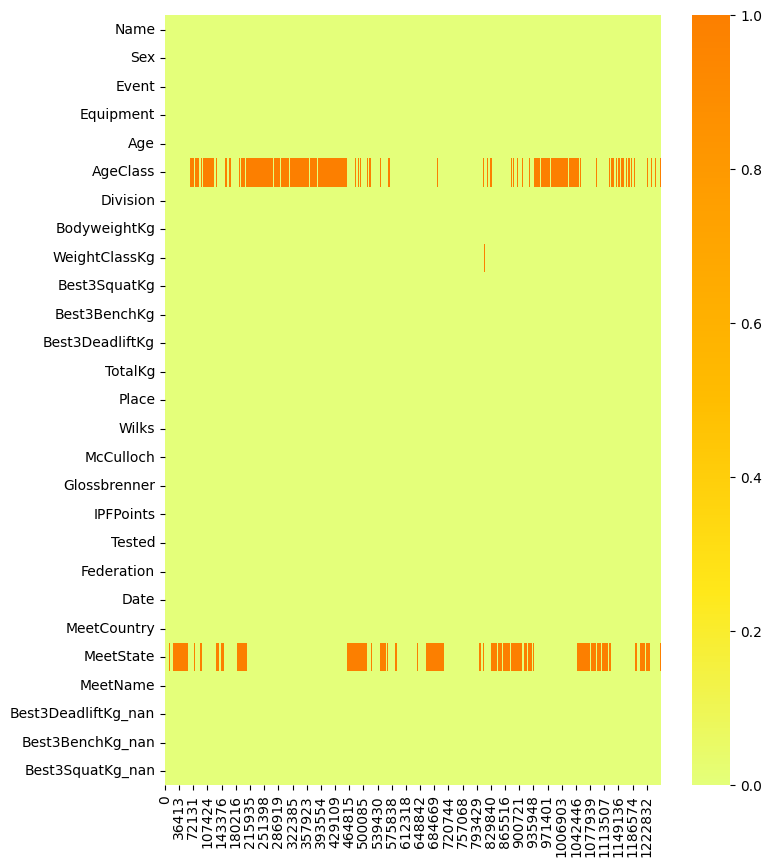

In [54]:
# See heat map

plt.figure(figsize = (8, 10))
sns.heatmap(df.isna().transpose(), cmap = 'Wistia')
plt.show()

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1231156 entries, 0 to 1260354
Data columns (total 27 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   Name                 1231156 non-null  object 
 1   Sex                  1231156 non-null  object 
 2   Event                1231156 non-null  object 
 3   Equipment            1231156 non-null  object 
 4   Age                  1231156 non-null  float64
 5   AgeClass             711236 non-null   object 
 6   Division             1231156 non-null  object 
 7   BodyweightKg         1231156 non-null  float64
 8   WeightClassKg        1229076 non-null  object 
 9   Best3SquatKg         1231156 non-null  float64
 10  Best3BenchKg         1231156 non-null  float64
 11  Best3DeadliftKg      1231156 non-null  float64
 12  TotalKg              1231156 non-null  float64
 13  Place                1231156 non-null  object 
 14  Wilks                1231156 non-null  float64
 15

In [56]:
# drop names

df = df.drop('Name', axis = 1)

df

,Sex,Event,Equipment,Age,AgeClass,Division,BodyweightKg,WeightClassKg,Best3SquatKg,Best3BenchKg,...,IPFPoints,Tested,Federation,Date,MeetCountry,MeetState,MeetName,Best3DeadliftKg_nan,Best3BenchKg_nan,Best3SquatKg_nan
0,F,SBD,Wraps,29.0,24-34,f-or,59.8,60,105.0,55.0,...,511.15,No,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup,0,0,0
1,F,SBD,Wraps,29.0,24-34,f-or,58.5,60,120.0,67.5,...,595.65,No,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup,0,0,0
2,F,B,Raw,40.0,40-44,f-or,55.4,56,0.0,32.5,...,313.97,No,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup,1,0,1
3,F,SBD,Wraps,23.0,20-23,f-or,60.0,60,105.0,72.5,...,547.04,No,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup,0,0,0
4,F,SBD,Wraps,45.0,45-49,f-or,104.0,110,140.0,80.0,...,550.08,No,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1260350,M,SBD,Raw,65.5,65-69,masters 2,78.0,83,215.0,115.0,...,549.30,Yes,PZKFiTS,2017-04-01,Poland,NaN,Polish Classic Powerlifting Cup,0,0,0
1260351,M,SBD,Raw,67.5,65-69,masters 2,72.7,74,200.0,70.0,...,538.44,Yes,PZKFiTS,2017-04-01,Poland,NaN,Polish Classic Powerlifting Cup,0,0,0
1260352,M,SBD,Raw,60.5,60-64,masters 2,73.5,74,175.0,87.5,...,469.67,Yes,PZKFiTS,2017-04-01,Poland,NaN,Polish Classic Powerlifting Cup,0,0,0
1260353,M,SBD,Raw,55.5,55-59,masters 2,63.5,66,110.0,95.0,...,423.03,Yes,PZKFiTS,2017-04-01,Poland,NaN,Polish Classic Powerlifting Cup,0,0,0


In [57]:
# What about sex?

df['Sex'].value_counts()

M    908918
F    322238
Name: Sex, dtype: int64

In [58]:
# We have only two genders
# And it's seems that there are much more mans than womans

label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])

df

,Sex,Event,Equipment,Age,AgeClass,Division,BodyweightKg,WeightClassKg,Best3SquatKg,Best3BenchKg,...,IPFPoints,Tested,Federation,Date,MeetCountry,MeetState,MeetName,Best3DeadliftKg_nan,Best3BenchKg_nan,Best3SquatKg_nan
0,0,SBD,Wraps,29.0,24-34,f-or,59.8,60,105.0,55.0,...,511.15,No,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup,0,0,0
1,0,SBD,Wraps,29.0,24-34,f-or,58.5,60,120.0,67.5,...,595.65,No,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup,0,0,0
2,0,B,Raw,40.0,40-44,f-or,55.4,56,0.0,32.5,...,313.97,No,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup,1,0,1
3,0,SBD,Wraps,23.0,20-23,f-or,60.0,60,105.0,72.5,...,547.04,No,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup,0,0,0
4,0,SBD,Wraps,45.0,45-49,f-or,104.0,110,140.0,80.0,...,550.08,No,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1260350,1,SBD,Raw,65.5,65-69,masters 2,78.0,83,215.0,115.0,...,549.30,Yes,PZKFiTS,2017-04-01,Poland,NaN,Polish Classic Powerlifting Cup,0,0,0
1260351,1,SBD,Raw,67.5,65-69,masters 2,72.7,74,200.0,70.0,...,538.44,Yes,PZKFiTS,2017-04-01,Poland,NaN,Polish Classic Powerlifting Cup,0,0,0
1260352,1,SBD,Raw,60.5,60-64,masters 2,73.5,74,175.0,87.5,...,469.67,Yes,PZKFiTS,2017-04-01,Poland,NaN,Polish Classic Powerlifting Cup,0,0,0
1260353,1,SBD,Raw,55.5,55-59,masters 2,63.5,66,110.0,95.0,...,423.03,Yes,PZKFiTS,2017-04-01,Poland,NaN,Polish Classic Powerlifting Cup,0,0,0


In [59]:
# Let's see info about Equipment

df['Equipment'].value_counts()

Single-ply    673435
Raw           407775
Wraps          97964
Multi-ply      51974
Straps             8
Name: Equipment, dtype: int64

In [60]:
# Probably it's be better if we get rid of Straps equipment

df = df[df['Equipment'] != 'Straps']

df['Equipment'].value_counts()

Single-ply    673435
Raw           407775
Wraps          97964
Multi-ply      51974
Name: Equipment, dtype: int64

In [61]:
# And use lable encoding

df['Equipment'] = label_encoder.fit_transform(df['Equipment'])

df

<ipython-input-61-9833cc7bc7c6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Equipment'] = label_encoder.fit_transform(df['Equipment'])


,Sex,Event,Equipment,Age,AgeClass,Division,BodyweightKg,WeightClassKg,Best3SquatKg,Best3BenchKg,...,IPFPoints,Tested,Federation,Date,MeetCountry,MeetState,MeetName,Best3DeadliftKg_nan,Best3BenchKg_nan,Best3SquatKg_nan
0,0,SBD,3,29.0,24-34,f-or,59.8,60,105.0,55.0,...,511.15,No,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup,0,0,0
1,0,SBD,3,29.0,24-34,f-or,58.5,60,120.0,67.5,...,595.65,No,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup,0,0,0
2,0,B,1,40.0,40-44,f-or,55.4,56,0.0,32.5,...,313.97,No,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup,1,0,1
3,0,SBD,3,23.0,20-23,f-or,60.0,60,105.0,72.5,...,547.04,No,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup,0,0,0
4,0,SBD,3,45.0,45-49,f-or,104.0,110,140.0,80.0,...,550.08,No,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1260350,1,SBD,1,65.5,65-69,masters 2,78.0,83,215.0,115.0,...,549.30,Yes,PZKFiTS,2017-04-01,Poland,NaN,Polish Classic Powerlifting Cup,0,0,0
1260351,1,SBD,1,67.5,65-69,masters 2,72.7,74,200.0,70.0,...,538.44,Yes,PZKFiTS,2017-04-01,Poland,NaN,Polish Classic Powerlifting Cup,0,0,0
1260352,1,SBD,1,60.5,60-64,masters 2,73.5,74,175.0,87.5,...,469.67,Yes,PZKFiTS,2017-04-01,Poland,NaN,Polish Classic Powerlifting Cup,0,0,0
1260353,1,SBD,1,55.5,55-59,masters 2,63.5,66,110.0,95.0,...,423.03,Yes,PZKFiTS,2017-04-01,Poland,NaN,Polish Classic Powerlifting Cup,0,0,0


In [62]:
# Back to divisions

df['Division'].value_counts()

open                297677
boys                240574
girls               103036
juniors              46162
mr-o                 27373
                     ...  
mm-4-sp                  1
mms                      1
f2-e                     1
m1-e                     1
juniors under 34         1
Name: Division, Length: 4462, dtype: int64

In [63]:
# So there are some divisions that have not enought values
# Get rid of them

divisions_to_remove = df['Division'].value_counts()[df['Division'].value_counts() < 500].index

df = df[~df['Division'].isin(divisions_to_remove)]

df['Division'].value_counts()

open                  297677
boys                  240574
girls                 103036
juniors                46162
mr-o                   27373
                       ...  
class 2a                 524
mr-hs                    517
fr-m2                    514
amateur teen 14-15       502
m_ocr_apf                500
Name: Division, Length: 161, dtype: int64

In [64]:
df.shape

(1129427, 26)

In [65]:
df['Division'] = label_encoder.fit_transform(df['Division'])

df.head()

<ipython-input-65-3a44d8bfed9f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Division'] = label_encoder.fit_transform(df['Division'])


,Sex,Event,Equipment,Age,AgeClass,Division,BodyweightKg,WeightClassKg,Best3SquatKg,Best3BenchKg,...,IPFPoints,Tested,Federation,Date,MeetCountry,MeetState,MeetName,Best3DeadliftKg_nan,Best3BenchKg_nan,Best3SquatKg_nan
0,0,SBD,3,29.0,24-34,25,59.8,60,105.0,55.0,...,511.15,No,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup,0,0,0
1,0,SBD,3,29.0,24-34,25,58.5,60,120.0,67.5,...,595.65,No,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup,0,0,0
2,0,B,1,40.0,40-44,25,55.4,56,0.0,32.5,...,313.97,No,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup,1,0,1
3,0,SBD,3,23.0,20-23,25,60.0,60,105.0,72.5,...,547.04,No,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup,0,0,0
4,0,SBD,3,45.0,45-49,25,104.0,110,140.0,80.0,...,550.08,No,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup,0,0,0


In [66]:
# We remove a lot of rows, but still have ~1 millon rows
# Handle AgeClass now

df['AgeClass'].value_counts()

24-34     206809
20-23     115917
35-39      53337
18-19      51876
40-44      50739
45-49      35778
16-17      34877
50-54      27594
13-15      16276
55-59      15664
60-64      10201
65-69       5465
70-74       2909
75-79       1163
5-12         424
80-999       268
Name: AgeClass, dtype: int64

In [67]:
df['AgeClass'] = label_encoder.fit_transform(df['AgeClass'])

df.head()

<ipython-input-67-6b67b29bb495>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AgeClass'] = label_encoder.fit_transform(df['AgeClass'])


,Sex,Event,Equipment,Age,AgeClass,Division,BodyweightKg,WeightClassKg,Best3SquatKg,Best3BenchKg,...,IPFPoints,Tested,Federation,Date,MeetCountry,MeetState,MeetName,Best3DeadliftKg_nan,Best3BenchKg_nan,Best3SquatKg_nan
0,0,SBD,3,29.0,4,25,59.8,60,105.0,55.0,...,511.15,No,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup,0,0,0
1,0,SBD,3,29.0,4,25,58.5,60,120.0,67.5,...,595.65,No,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup,0,0,0
2,0,B,1,40.0,6,25,55.4,56,0.0,32.5,...,313.97,No,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup,1,0,1
3,0,SBD,3,23.0,3,25,60.0,60,105.0,72.5,...,547.04,No,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup,0,0,0
4,0,SBD,3,45.0,7,25,104.0,110,140.0,80.0,...,550.08,No,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup,0,0,0


In [68]:
# Try handle MeetCountry now

df['MeetCountry'].value_counts()

USA            674159
Russia          63802
Canada          41804
Ukraine         39866
Australia       31893
                ...  
Guyana             43
USSR               43
Egypt              32
Moldova            27
El Salvador        27
Name: MeetCountry, Length: 96, dtype: int64

In [69]:
# Get rid of countres with less than 50 samples

divisions_to_remove = df['MeetCountry'].value_counts()[df['MeetCountry'].value_counts() < 50].index
df = df[~df['MeetCountry'].isin(divisions_to_remove)]

df['MeetCountry'] = label_encoder.fit_transform(df['MeetCountry'])

df.head()

,Sex,Event,Equipment,Age,AgeClass,Division,BodyweightKg,WeightClassKg,Best3SquatKg,Best3BenchKg,...,IPFPoints,Tested,Federation,Date,MeetCountry,MeetState,MeetName,Best3DeadliftKg_nan,Best3BenchKg_nan,Best3SquatKg_nan
0,0,SBD,3,29.0,4,25,59.8,60,105.0,55.0,...,511.15,No,GPC-AUS,2018-10-27,3,VIC,Melbourne Cup,0,0,0
1,0,SBD,3,29.0,4,25,58.5,60,120.0,67.5,...,595.65,No,GPC-AUS,2018-10-27,3,VIC,Melbourne Cup,0,0,0
2,0,B,1,40.0,6,25,55.4,56,0.0,32.5,...,313.97,No,GPC-AUS,2018-10-27,3,VIC,Melbourne Cup,1,0,1
3,0,SBD,3,23.0,3,25,60.0,60,105.0,72.5,...,547.04,No,GPC-AUS,2018-10-27,3,VIC,Melbourne Cup,0,0,0
4,0,SBD,3,45.0,7,25,104.0,110,140.0,80.0,...,550.08,No,GPC-AUS,2018-10-27,3,VIC,Melbourne Cup,0,0,0


In [70]:
# Investigate MeetName

df['MeetName'].value_counts()

World Championships                          22180
European Championships                       10443
World Masters Powerlifting Championships      5512
World Bench Press Championships               5407
Raw Nationals                                 5317
                                             ...  
DM i styrkelyft utrustning Södra Norrland        1
KM-BP TK Trossö                                  1
SWPLA Push Pull                                  1
DM bänkpress SNSF                                1
American Meet                                    1
Name: MeetName, Length: 11248, dtype: int64

In [71]:
# So we have 10k classes, i guess we can drop whole colum

df = df.drop('MeetName', axis = 1)

df

,Sex,Event,Equipment,Age,AgeClass,Division,BodyweightKg,WeightClassKg,Best3SquatKg,Best3BenchKg,...,Glossbrenner,IPFPoints,Tested,Federation,Date,MeetCountry,MeetState,Best3DeadliftKg_nan,Best3BenchKg_nan,Best3SquatKg_nan
0,0,SBD,3,29.0,4,25,59.8,60,105.0,55.0,...,286.42,511.15,No,GPC-AUS,2018-10-27,3,VIC,0,0,0
1,0,SBD,3,29.0,4,25,58.5,60,120.0,67.5,...,334.16,595.65,No,GPC-AUS,2018-10-27,3,VIC,0,0,0
2,0,B,1,40.0,6,25,55.4,56,0.0,32.5,...,34.12,313.97,No,GPC-AUS,2018-10-27,3,VIC,1,0,1
3,0,SBD,3,23.0,3,25,60.0,60,105.0,72.5,...,305.37,547.04,No,GPC-AUS,2018-10-27,3,VIC,0,0,0
4,0,SBD,3,45.0,7,25,104.0,110,140.0,80.0,...,274.56,550.08,No,GPC-AUS,2018-10-27,3,VIC,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1260350,1,SBD,1,65.5,12,85,78.0,83,215.0,115.0,...,360.48,549.30,Yes,PZKFiTS,2017-04-01,62,NaN,0,0,0
1260351,1,SBD,1,67.5,12,85,72.7,74,200.0,70.0,...,356.14,538.44,Yes,PZKFiTS,2017-04-01,62,NaN,0,0,0
1260352,1,SBD,1,60.5,11,85,73.5,74,175.0,87.5,...,316.52,469.67,Yes,PZKFiTS,2017-04-01,62,NaN,0,0,0
1260353,1,SBD,1,55.5,10,85,63.5,66,110.0,95.0,...,295.66,423.03,Yes,PZKFiTS,2017-04-01,62,NaN,0,0,0


In [72]:
# Investigate Federation

df['Federation'].value_counts()

THSPA       248790
THSWPA      104056
USAPL        91723
USPA         74265
IPF          34845
             ...  
USARawBP         3
FCA              2
SLP              2
SPSS             1
USSF             1
Name: Federation, Length: 214, dtype: int64

In [73]:
# Drop values with less than 1000 samples

divisions_to_remove = df['Federation'].value_counts()[df['Federation'].value_counts() < 1000].index
df = df[~df['Federation'].isin(divisions_to_remove)]

df['Federation'].value_counts()

THSPA          248790
THSWPA         104056
USAPL           91723
USPA            74265
IPF             34845
                ...  
AAP              1041
WPU-RUS          1033
RAW-CAN          1030
UPC-Germany      1019
LPF              1017
Name: Federation, Length: 73, dtype: int64

In [74]:
# Get label encoding

df['Federation'] = label_encoder.fit_transform(df['Federation'])

df

<ipython-input-74-93128d2860be>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Federation'] = label_encoder.fit_transform(df['Federation'])


,Sex,Event,Equipment,Age,AgeClass,Division,BodyweightKg,WeightClassKg,Best3SquatKg,Best3BenchKg,...,Glossbrenner,IPFPoints,Tested,Federation,Date,MeetCountry,MeetState,Best3DeadliftKg_nan,Best3BenchKg_nan,Best3SquatKg_nan
0,0,SBD,3,29.0,4,25,59.8,60,105.0,55.0,...,286.42,511.15,No,22,2018-10-27,3,VIC,0,0,0
1,0,SBD,3,29.0,4,25,58.5,60,120.0,67.5,...,334.16,595.65,No,22,2018-10-27,3,VIC,0,0,0
2,0,B,1,40.0,6,25,55.4,56,0.0,32.5,...,34.12,313.97,No,22,2018-10-27,3,VIC,1,0,1
3,0,SBD,3,23.0,3,25,60.0,60,105.0,72.5,...,305.37,547.04,No,22,2018-10-27,3,VIC,0,0,0
4,0,SBD,3,45.0,7,25,104.0,110,140.0,80.0,...,274.56,550.08,No,22,2018-10-27,3,VIC,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1259379,1,SBD,1,33.5,4,70,94.6,105,190.0,105.0,...,305.94,451.96,Yes,28,2018-03-10,37,NaN,0,0,0
1259380,1,SBD,1,28.0,16,70,94.8,105,190.0,102.5,...,289.15,422.42,Yes,28,2018-03-10,37,NaN,0,0,0
1259381,1,SBD,1,48.5,7,70,99.0,105,177.5,100.0,...,268.76,384.78,Yes,28,2018-03-10,37,NaN,0,0,0
1259382,1,SBD,1,28.0,16,70,113.0,120,185.0,87.5,...,263.98,367.57,Yes,28,2018-03-10,37,NaN,0,0,0


In [75]:
# Investigate MeetState

df['MeetState'].value_counts()

TX     381025
CA      38298
FL      20382
OH      17620
PA      17436
        ...  
SP         37
HR         30
GIS        27
TKI        24
RP         16
Name: MeetState, Length: 104, dtype: int64

In [76]:
# Get rid of rows with MeetState less than 1000 samples

divisions_to_remove = df['MeetState'].value_counts()[df['MeetState'].value_counts() < 1000].index
df = df[~df['MeetState'].isin(divisions_to_remove)]

df['MeetState'].value_counts()

TX     381025
CA      38298
FL      20382
OH      17620
PA      17436
        ...  
NM       1270
OTA      1228
MT       1048
NB       1026
WY       1025
Name: MeetState, Length: 67, dtype: int64

In [77]:
# Use label encoding

df['MeetState'] = label_encoder.fit_transform(df['MeetState'])

df

<ipython-input-77-975099cdc7ee>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MeetState'] = label_encoder.fit_transform(df['MeetState'])


,Sex,Event,Equipment,Age,AgeClass,Division,BodyweightKg,WeightClassKg,Best3SquatKg,Best3BenchKg,...,Glossbrenner,IPFPoints,Tested,Federation,Date,MeetCountry,MeetState,Best3DeadliftKg_nan,Best3BenchKg_nan,Best3SquatKg_nan
0,0,SBD,3,29.0,4,25,59.8,60,105.0,55.0,...,286.42,511.15,No,22,2018-10-27,3,61,0,0,0
1,0,SBD,3,29.0,4,25,58.5,60,120.0,67.5,...,334.16,595.65,No,22,2018-10-27,3,61,0,0,0
2,0,B,1,40.0,6,25,55.4,56,0.0,32.5,...,34.12,313.97,No,22,2018-10-27,3,61,1,0,1
3,0,SBD,3,23.0,3,25,60.0,60,105.0,72.5,...,305.37,547.04,No,22,2018-10-27,3,61,0,0,0
4,0,SBD,3,45.0,7,25,104.0,110,140.0,80.0,...,274.56,550.08,No,22,2018-10-27,3,61,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1259379,1,SBD,1,33.5,4,70,94.6,105,190.0,105.0,...,305.94,451.96,Yes,28,2018-03-10,37,67,0,0,0
1259380,1,SBD,1,28.0,16,70,94.8,105,190.0,102.5,...,289.15,422.42,Yes,28,2018-03-10,37,67,0,0,0
1259381,1,SBD,1,48.5,7,70,99.0,105,177.5,100.0,...,268.76,384.78,Yes,28,2018-03-10,37,67,0,0,0
1259382,1,SBD,1,28.0,16,70,113.0,120,185.0,87.5,...,263.98,367.57,Yes,28,2018-03-10,37,67,0,0,0


In [78]:
# Get lable encoding on Tested colum

df['Tested'] = label_encoder.fit_transform(df['Tested'])

df

<ipython-input-78-85b8dfedda42>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Tested'] = label_encoder.fit_transform(df['Tested'])


,Sex,Event,Equipment,Age,AgeClass,Division,BodyweightKg,WeightClassKg,Best3SquatKg,Best3BenchKg,...,Glossbrenner,IPFPoints,Tested,Federation,Date,MeetCountry,MeetState,Best3DeadliftKg_nan,Best3BenchKg_nan,Best3SquatKg_nan
0,0,SBD,3,29.0,4,25,59.8,60,105.0,55.0,...,286.42,511.15,0,22,2018-10-27,3,61,0,0,0
1,0,SBD,3,29.0,4,25,58.5,60,120.0,67.5,...,334.16,595.65,0,22,2018-10-27,3,61,0,0,0
2,0,B,1,40.0,6,25,55.4,56,0.0,32.5,...,34.12,313.97,0,22,2018-10-27,3,61,1,0,1
3,0,SBD,3,23.0,3,25,60.0,60,105.0,72.5,...,305.37,547.04,0,22,2018-10-27,3,61,0,0,0
4,0,SBD,3,45.0,7,25,104.0,110,140.0,80.0,...,274.56,550.08,0,22,2018-10-27,3,61,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1259379,1,SBD,1,33.5,4,70,94.6,105,190.0,105.0,...,305.94,451.96,1,28,2018-03-10,37,67,0,0,0
1259380,1,SBD,1,28.0,16,70,94.8,105,190.0,102.5,...,289.15,422.42,1,28,2018-03-10,37,67,0,0,0
1259381,1,SBD,1,48.5,7,70,99.0,105,177.5,100.0,...,268.76,384.78,1,28,2018-03-10,37,67,0,0,0
1259382,1,SBD,1,28.0,16,70,113.0,120,185.0,87.5,...,263.98,367.57,1,28,2018-03-10,37,67,0,0,0


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1083755 entries, 0 to 1259383
Data columns (total 25 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   Sex                  1083755 non-null  int64  
 1   Event                1083755 non-null  object 
 2   Equipment            1083755 non-null  int64  
 3   Age                  1083755 non-null  float64
 4   AgeClass             1083755 non-null  int64  
 5   Division             1083755 non-null  int64  
 6   BodyweightKg         1083755 non-null  float64
 7   WeightClassKg        1082882 non-null  object 
 8   Best3SquatKg         1083755 non-null  float64
 9   Best3BenchKg         1083755 non-null  float64
 10  Best3DeadliftKg      1083755 non-null  float64
 11  TotalKg              1083755 non-null  float64
 12  Place                1083755 non-null  object 
 13  Wilks                1083755 non-null  float64
 14  McCulloch            1083755 non-null  float64
 15

In [80]:
# Get rid of Date colum

df = df.drop('Date', axis = 1)

df

,Sex,Event,Equipment,Age,AgeClass,Division,BodyweightKg,WeightClassKg,Best3SquatKg,Best3BenchKg,...,McCulloch,Glossbrenner,IPFPoints,Tested,Federation,MeetCountry,MeetState,Best3DeadliftKg_nan,Best3BenchKg_nan,Best3SquatKg_nan
0,0,SBD,3,29.0,4,25,59.8,60,105.0,55.0,...,324.16,286.42,511.15,0,22,3,61,0,0,0
1,0,SBD,3,29.0,4,25,58.5,60,120.0,67.5,...,378.07,334.16,595.65,0,22,3,61,0,0,0
2,0,B,1,40.0,6,25,55.4,56,0.0,32.5,...,38.56,34.12,313.97,0,22,3,61,1,0,1
3,0,SBD,3,23.0,3,25,60.0,60,105.0,72.5,...,345.61,305.37,547.04,0,22,3,61,0,0,0
4,0,SBD,3,45.0,7,25,104.0,110,140.0,80.0,...,338.91,274.56,550.08,0,22,3,61,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1259379,1,SBD,1,33.5,4,70,94.6,105,190.0,105.0,...,317.84,305.94,451.96,1,28,37,67,0,0,0
1259380,1,SBD,1,28.0,16,70,94.8,105,190.0,102.5,...,300.42,289.15,422.42,1,28,37,67,0,0,0
1259381,1,SBD,1,48.5,7,70,99.0,105,177.5,100.0,...,306.68,268.76,384.78,1,28,37,67,0,0,0
1259382,1,SBD,1,28.0,16,70,113.0,120,185.0,87.5,...,275.87,263.98,367.57,1,28,37,67,0,0,0


In [81]:
# Investigate event

df['Event'].value_counts()

SBD    880454
B      164527
D       36380
S        2394
Name: Event, dtype: int64

In [82]:
# Use lable encoding

df['Event'] = label_encoder.fit_transform(df['Event'])

df

,Sex,Event,Equipment,Age,AgeClass,Division,BodyweightKg,WeightClassKg,Best3SquatKg,Best3BenchKg,...,McCulloch,Glossbrenner,IPFPoints,Tested,Federation,MeetCountry,MeetState,Best3DeadliftKg_nan,Best3BenchKg_nan,Best3SquatKg_nan
0,0,3,3,29.0,4,25,59.8,60,105.0,55.0,...,324.16,286.42,511.15,0,22,3,61,0,0,0
1,0,3,3,29.0,4,25,58.5,60,120.0,67.5,...,378.07,334.16,595.65,0,22,3,61,0,0,0
2,0,0,1,40.0,6,25,55.4,56,0.0,32.5,...,38.56,34.12,313.97,0,22,3,61,1,0,1
3,0,3,3,23.0,3,25,60.0,60,105.0,72.5,...,345.61,305.37,547.04,0,22,3,61,0,0,0
4,0,3,3,45.0,7,25,104.0,110,140.0,80.0,...,338.91,274.56,550.08,0,22,3,61,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1259379,1,3,1,33.5,4,70,94.6,105,190.0,105.0,...,317.84,305.94,451.96,1,28,37,67,0,0,0
1259380,1,3,1,28.0,16,70,94.8,105,190.0,102.5,...,300.42,289.15,422.42,1,28,37,67,0,0,0
1259381,1,3,1,48.5,7,70,99.0,105,177.5,100.0,...,306.68,268.76,384.78,1,28,37,67,0,0,0
1259382,1,3,1,28.0,16,70,113.0,120,185.0,87.5,...,275.87,263.98,367.57,1,28,37,67,0,0,0


In [83]:
# Trunsfer WeightClassKg into int

df['WeightClassKg'] = pd.to_numeric(df['WeightClassKg'], errors = 'coerce')

df['WeightClassKg'] = df['WeightClassKg'].fillna(0)
df['WeightClassKg'] = df['WeightClassKg'].astype(int)

In [84]:
df['Place'].value_counts()

1      398276
2      178524
3      117806
4       85194
5       64835
        ...  
108         1
106         1
105         1
104         1
120         1
Name: Place, Length: 121, dtype: int64

In [85]:
divisions_to_remove = df['Place'].value_counts()[df['Place'].value_counts() < 50000].index
df = df[~df['Place'].isin(divisions_to_remove)]

df['Place'].value_counts()

1    398276
2    178524
3    117806
4     85194
5     64835
6     50557
Name: Place, dtype: int64

In [86]:
# Same with place feature

df['Place'] = pd.to_numeric(df['Place'], errors = 'coerce')

df['Place'] = df['Place'].fillna(0)
df['Place'] = df['Place'].astype(int)

<ipython-input-86-51e9881775ac>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Place'] = pd.to_numeric(df['Place'], errors = 'coerce')
<ipython-input-86-51e9881775ac>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Place'] = df['Place'].fillna(0)
<ipython-input-86-51e9881775ac>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 895192 entries, 0 to 1259383
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Sex                  895192 non-null  int64  
 1   Event                895192 non-null  int64  
 2   Equipment            895192 non-null  int64  
 3   Age                  895192 non-null  float64
 4   AgeClass             895192 non-null  int64  
 5   Division             895192 non-null  int64  
 6   BodyweightKg         895192 non-null  float64
 7   WeightClassKg        895192 non-null  int64  
 8   Best3SquatKg         895192 non-null  float64
 9   Best3BenchKg         895192 non-null  float64
 10  Best3DeadliftKg      895192 non-null  float64
 11  TotalKg              895192 non-null  float64
 12  Place                895192 non-null  int64  
 13  Wilks                895192 non-null  float64
 14  McCulloch            895192 non-null  float64
 15  Glossbrenner    

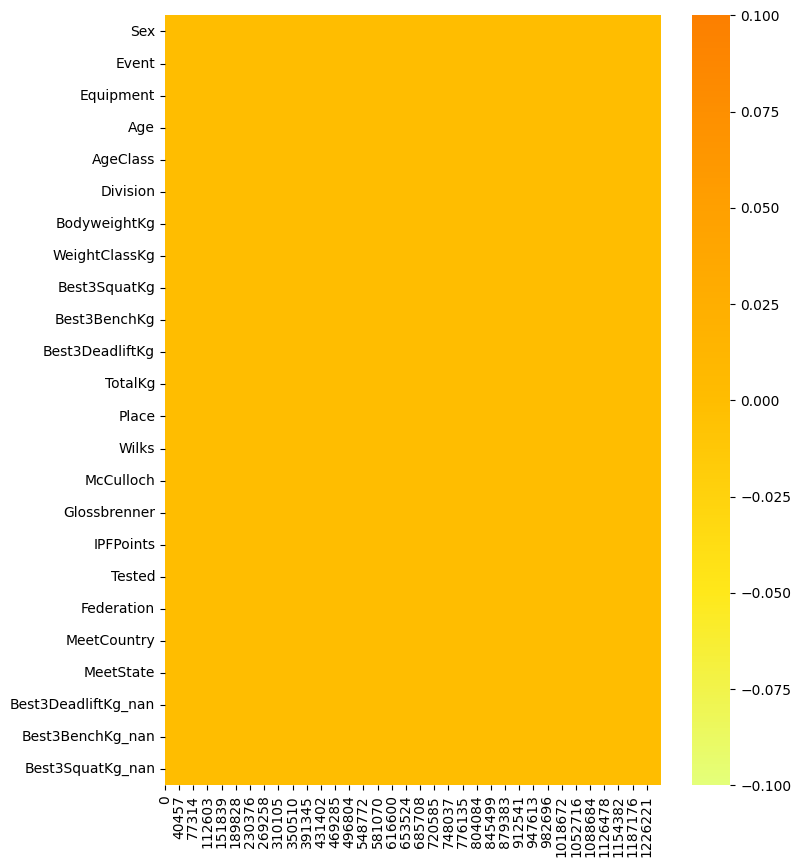

In [88]:
# Now data is clean...

plt.figure(figsize = (8, 10))
sns.heatmap(df.isna().transpose(), cmap = 'Wistia')
plt.show()

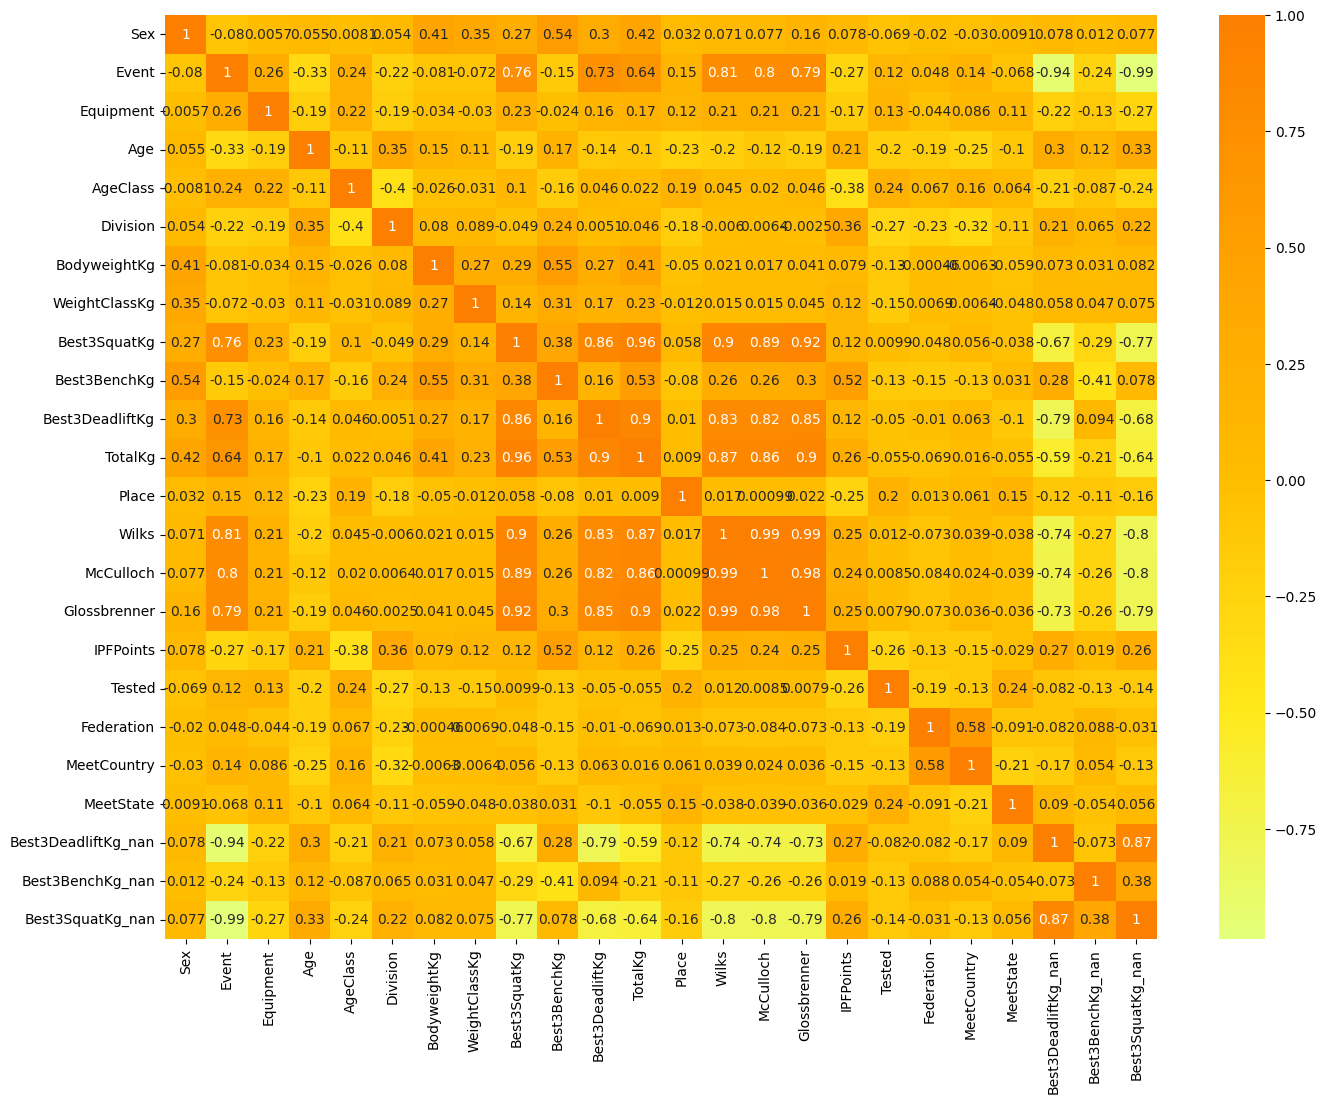

In [89]:
# Show colrrelations matrix

plt.figure(figsize = (16, 12))
sns.heatmap(df.corr(), annot = True, cmap = 'Wistia')
plt.show()

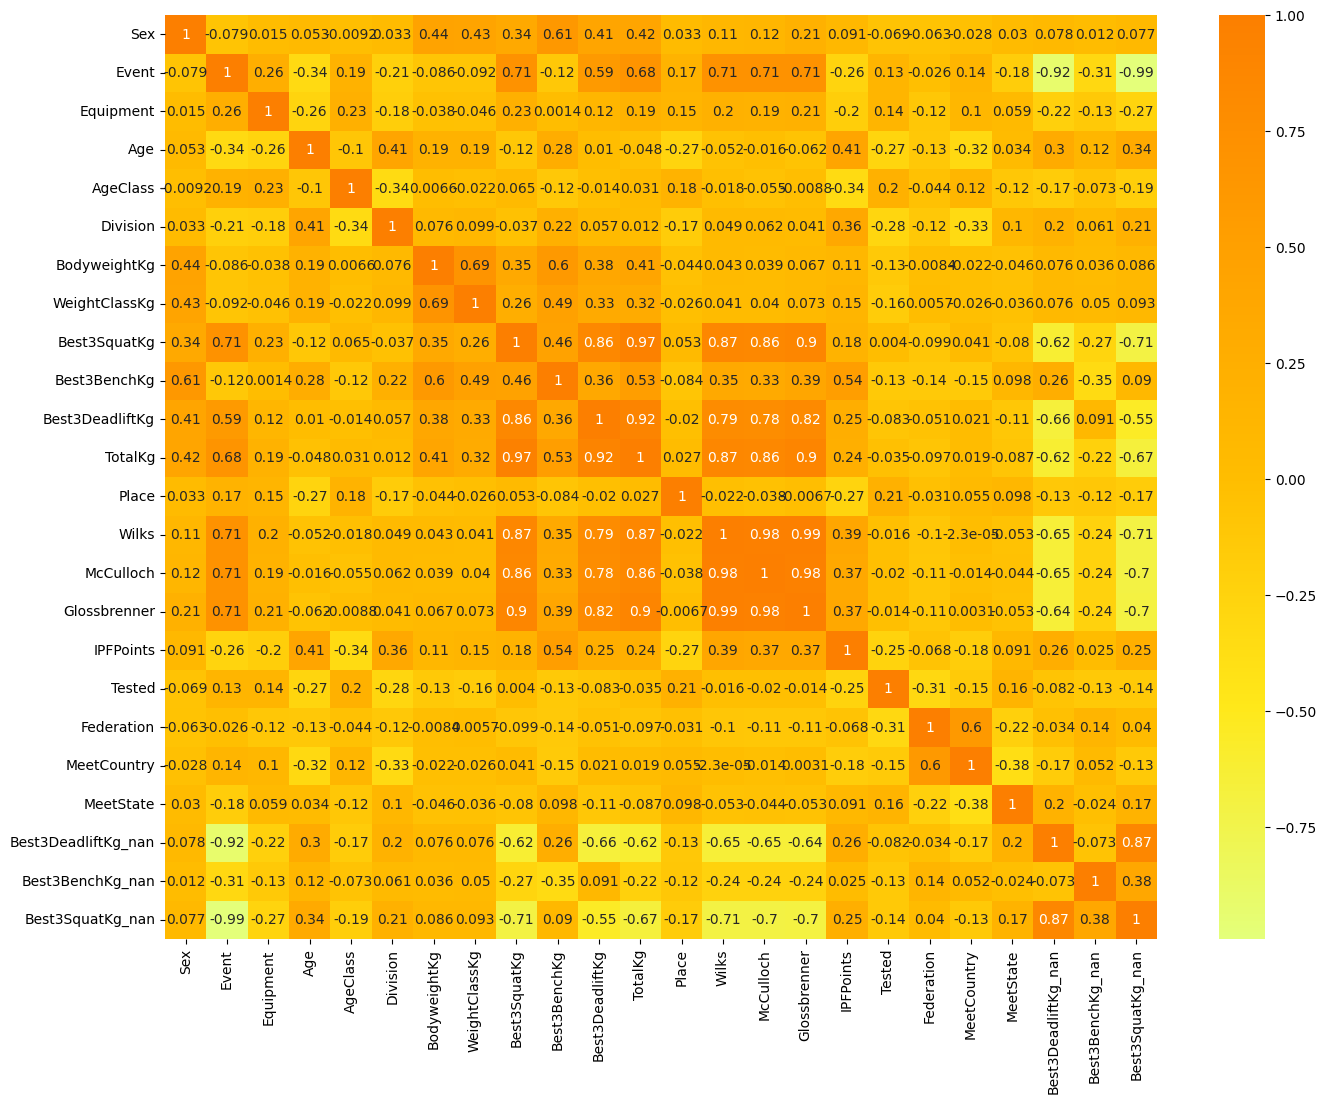

In [90]:
# May be spearman

plt.figure(figsize = (16, 12))
sns.heatmap(df.corr(method = 'spearman'), annot = True, cmap = 'Wistia')
plt.show()

array([[<Axes: title={'center': 'Sex'}>,
        <Axes: title={'center': 'Event'}>,
        <Axes: title={'center': 'Equipment'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'AgeClass'}>],
       [<Axes: title={'center': 'Division'}>,
        <Axes: title={'center': 'BodyweightKg'}>,
        <Axes: title={'center': 'WeightClassKg'}>,
        <Axes: title={'center': 'Best3SquatKg'}>,
        <Axes: title={'center': 'Best3BenchKg'}>],
       [<Axes: title={'center': 'Best3DeadliftKg'}>,
        <Axes: title={'center': 'TotalKg'}>,
        <Axes: title={'center': 'Place'}>,
        <Axes: title={'center': 'Wilks'}>,
        <Axes: title={'center': 'McCulloch'}>],
       [<Axes: title={'center': 'Glossbrenner'}>,
        <Axes: title={'center': 'IPFPoints'}>,
        <Axes: title={'center': 'Tested'}>,
        <Axes: title={'center': 'Federation'}>,
        <Axes: title={'center': 'MeetCountry'}>],
       [<Axes: title={'center': 'MeetState'}>,
        <Axes: 

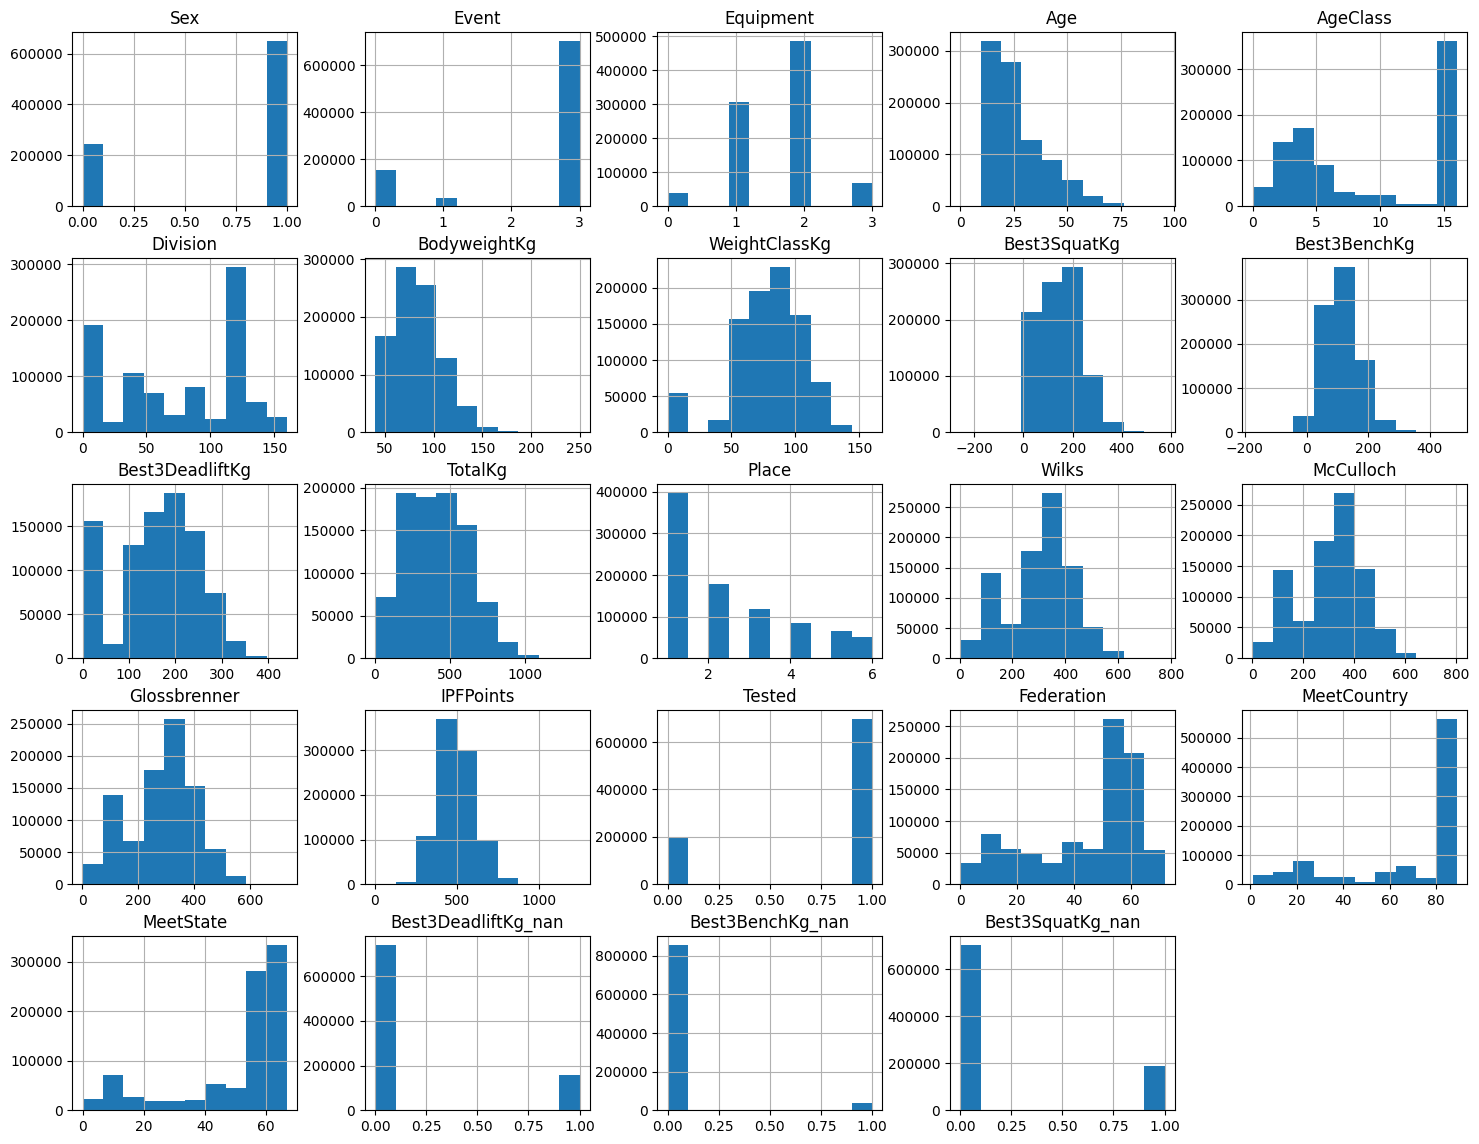

In [91]:
# Show histograms

df.hist(figsize = (18, 14))

<Axes: >

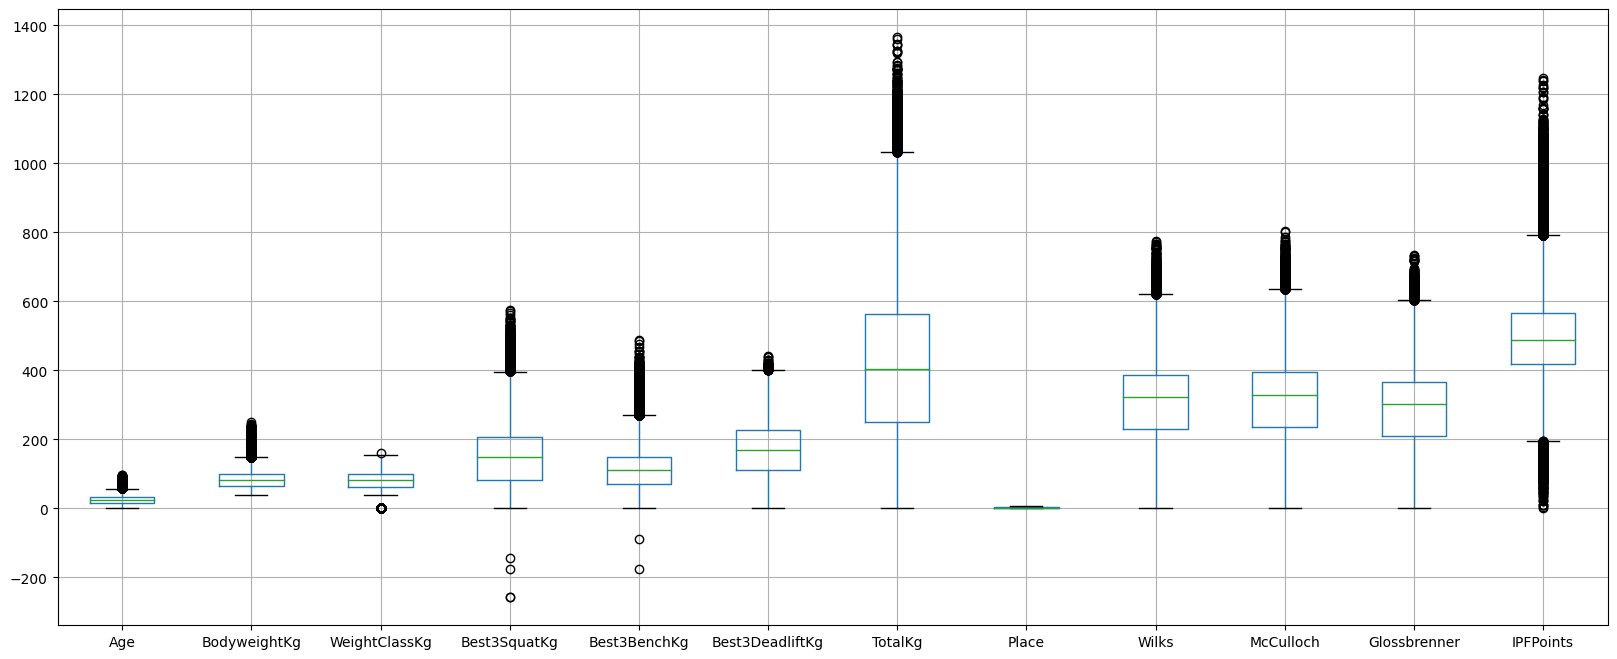

In [92]:
# Show box plots

df.drop(['Sex', 'Event', 'Equipment', 'AgeClass', 'Division', 'Tested', 'Best3DeadliftKg_nan',
         'Best3BenchKg_nan', 'Best3SquatKg_nan', 'MeetCountry', 'MeetState', 'Federation'], axis = 1).boxplot(figsize = (20, 8))

In [93]:
df.drop(['Sex', 'Event', 'Equipment', 'AgeClass', 'Division', 'Tested', 'Best3DeadliftKg_nan',
         'Best3BenchKg_nan', 'Best3SquatKg_nan', 'MeetCountry', 'MeetState', 'Federation'], axis = 1).describe()

,Age,BodyweightKg,WeightClassKg,Best3SquatKg,Best3BenchKg,Best3DeadliftKg,TotalKg,Place,Wilks,McCulloch,Glossbrenner,IPFPoints
count,895192.000000,895192.000000,895192.000000,895192.000000,895192.000000,895192.000000,895192.000000,895192.000000,895192.000000,895192.000000,895192.000000,895192.000000
mean,27.485640,84.211255,78.497882,141.042462,114.293408,158.357959,413.704072,2.320212,302.913518,310.402473,285.401826,496.582146
std,12.387248,23.672913,29.044390,94.660605,57.667965,91.450984,203.180556,1.552448,123.108213,124.681324,117.676668,109.340943
min,0.000000,40.000000,0.000000,-257.500000,-175.000000,0.000000,2.500000,1.000000,1.470000,1.470000,1.410000,2.160000
25%,16.500000,66.220000,63.000000,82.500000,70.000000,111.100000,249.480000,1.000000,230.200000,235.680000,209.560000,418.190000
50%,24.000000,81.780000,82.000000,149.690000,112.500000,170.100000,405.000000,2.000000,323.490000,329.780000,303.415000,488.760000
75%,33.000000,99.430000,100.000000,207.500000,150.000000,226.800000,562.500000,3.000000,386.470000,395.410000,366.850000,567.650000
max,95.500000,250.050000,160.000000,573.790000,488.500000,440.500000,1365.310000,6.000000,776.170000,804.400000,733.910000,1245.930000


In [94]:
# Drop values that less than 0

df = df[(df['Best3SquatKg'] >= 0) & (df['Best3BenchKg'] >= 0)]